In [1]:
from tensorboard.backend.event_processing import event_accumulator

ea = event_accumulator.EventAccumulator('logs/summaries/DJI_20250516151729_0005_V-100f-fps30_DyNeRF_pretrain_test/events.out.tfevents.1748093593.ZhizhangOFFICE.2938.0')
ea.Reload()  # 加载日志
print(ea.Tags())  # 查看所有标量标签（如 'loss/train'）

2025-05-28 16:21:07.429816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-28 16:21:07.437747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748420467.446506     960 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748420467.449078     960 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748420467.455725     960 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

{'images': ['rgb_holdout', 'mask', 'disp', 'rgb', 'depth', 'acc', 'rgb_s', 'depth_s', 'acc_s', 'rgb_d', 'depth_d', 'acc_d', 'induced_flow_f', 'induced_flow_b', 'flow_f_gt', 'flow_b_gt', 'dynamicness'], 'audio': [], 'histograms': [], 'scalars': ['loss', 'lr', 'Temp', 'psnr', 'img_loss', 'psnr_s', 'img_s_loss', 'psnr_d', 'img_d_loss', 'psnr_d_f', 'img_d_f_loss', 'psnr_d_b', 'img_d_b_loss', 'flow_f_loss', 'flow_b_loss', 'slow_loss', 'smooth_loss', 'sp_smooth_loss', 'consistency_loss', 'mask_loss', 'sparse_loss', 'depth_loss', 'order_loss', 'sf_smooth_loss', 'psnr_holdout', 'img_d_b_b_loss', 'img_d_f_f_loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


Loading logs: logs/summaries/DJI_20250516151729_0005_V-100f-fps30_DyNeRF_pretrain_test/events.out.tfevents.1748093593.ZhizhangOFFICE.2938.0
Available image tags (17):
  - rgb_holdout
  - mask
  - disp
  - rgb
  - depth
  - acc
  - rgb_s
  - depth_s
  - acc_s
  - rgb_d
  - depth_d
  - acc_d
  - induced_flow_f
  - induced_flow_b
  - flow_f_gt
  - flow_b_gt
  - dynamicness


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


FileNotFoundError: [Errno 2] No such file or directory: ''

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

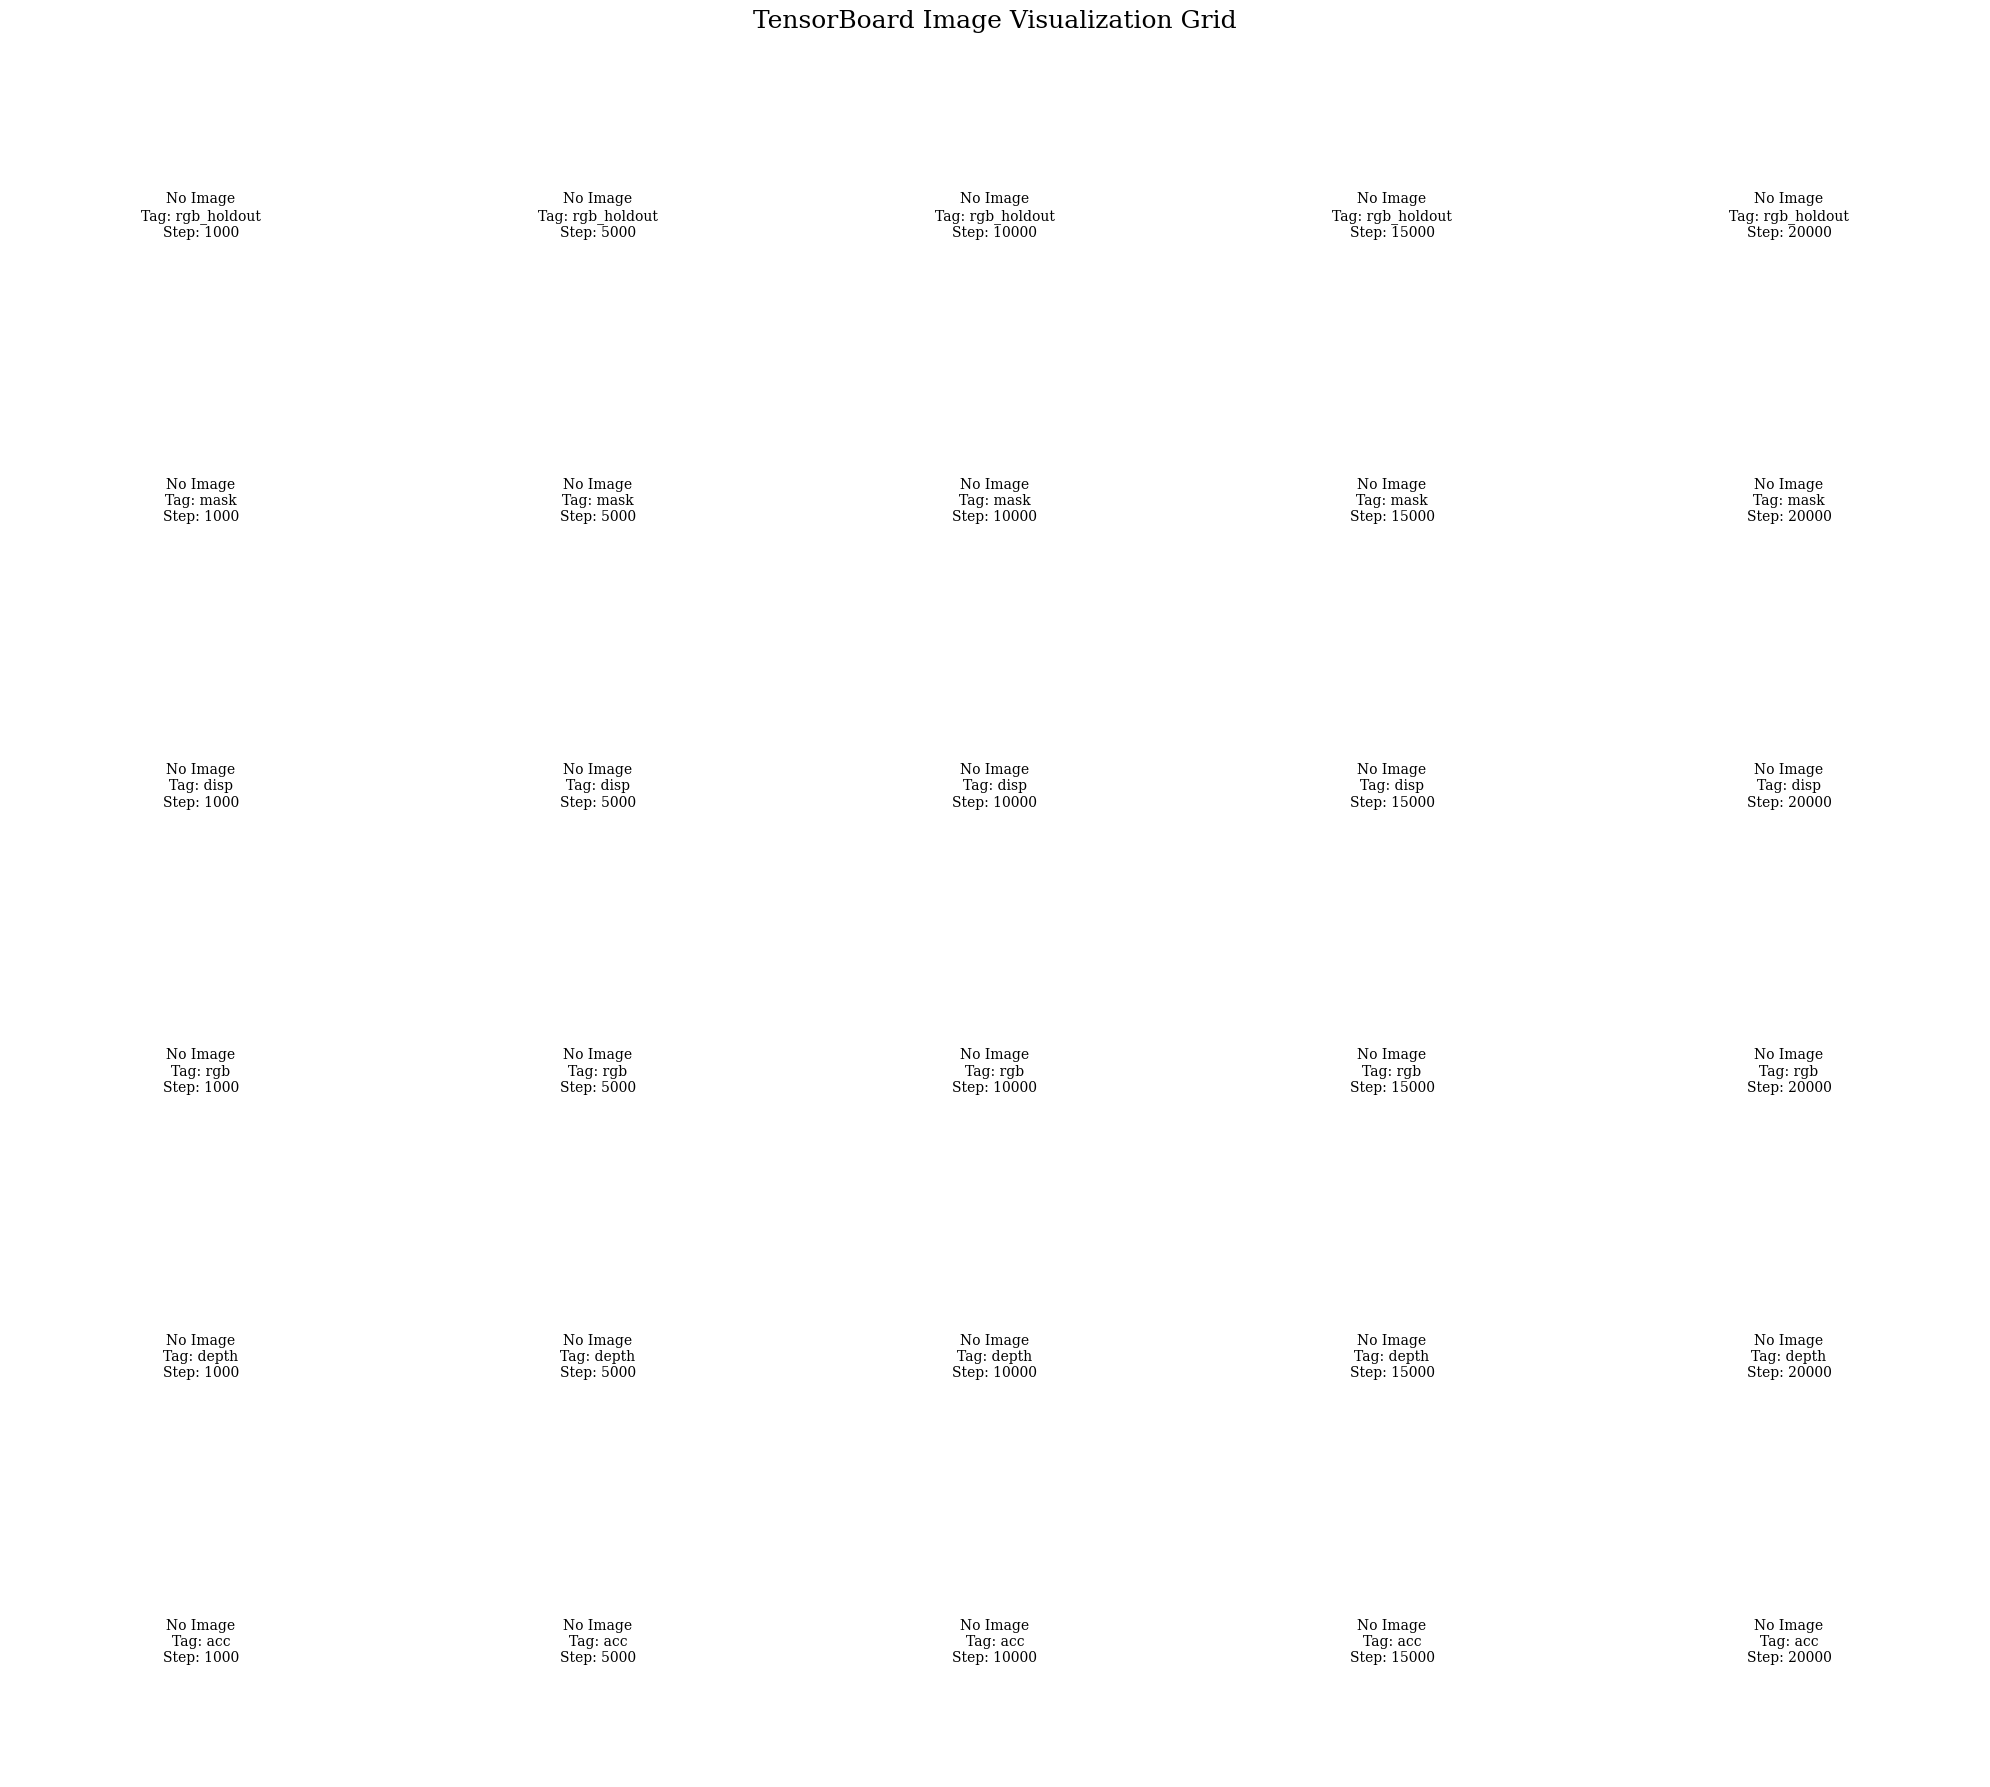

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
import os
from PIL import Image
import io

# 设置字体为Times New Roman
plt.rcParams["font.family"] = ["Times New Roman", "serif"]

def visualize_image_grid(log_path, tags_to_visualize, steps_to_visualize, save_path='image_grid.png'):
    """
    将多个标签在不同步数的图像数据组合成网格进行可视化
    
    Args:
        log_path: TensorBoard日志文件路径
        tags_to_visualize: 需要可视化的图像标签列表(作为行)
        steps_to_visualize: 需要可视化的步数列表(作为列)
        save_path: 可视化结果保存路径
    """
    # 加载TensorBoard数据
    print(f"Loading logs: {log_path}")
    ea = event_accumulator.EventAccumulator(
        log_path,
        size_guidance={
            event_accumulator.IMAGES: 0,  # 加载所有图像
        }
    )
    ea.Reload()  # 加载日志
    
    # 获取所有图像标签
    available_image_tags = ea.Tags()['images']
    print(f"Available image tags ({len(available_image_tags)}):")
    for tag in available_image_tags:
        print(f"  - {tag}")
    
    # 检查请求的标签是否存在
    missing_tags = [tag for tag in tags_to_visualize if tag not in available_image_tags]
    if missing_tags:
        print(f"Warning: Tags not found: {missing_tags}")
        tags_to_visualize = [tag for tag in tags_to_visualize if tag in available_image_tags]
        if not tags_to_visualize:
            print("No valid tags to visualize!")
            return
    
    # 创建图像网格
    rows = len(tags_to_visualize)
    cols = len(steps_to_visualize)
    
    # 动态调整图形大小
    fig_width = cols * 4  # 每列4英寸
    fig_height = rows * 3  # 每行3英寸
    
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    
    # 如果只有一个图像，确保axes是二维数组
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])
    elif rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    # 填充图像网格
    for i, tag in enumerate(tags_to_visualize):
        for j, step in enumerate(steps_to_visualize):
            ax = axes[i, j]
            
            # 获取对应标签和步数的图像
            image_events = ea.Images(tag)
            image_event = next((e for e in image_events if e.step == step), None)
            
            if image_event is not None:
                # 将图像数据转换为numpy数组
                img = Image.open(io.BytesIO(image_event.encoded_image_string))
                img_np = np.array(img)
                
                # 显示图像
                ax.imshow(img_np)
                ax.set_title(f"Step {step}", fontsize=12)
            else:
                # 如果没有找到图像，显示空白并标记
                ax.text(0.5, 0.5, f"No Image\nTag: {tag}\nStep: {step}", 
                        ha='center', va='center', transform=ax.transAxes)
                ax.set_facecolor('lightgray')
            
            # 隐藏坐标轴
            ax.axis('off')
    
    # 设置行标签（标签名称）
    for i, tag in enumerate(tags_to_visualize):
        axes[i, 0].set_ylabel(tag, fontsize=14, rotation=0, ha='right', va='center')
    
    # 设置总标题
    plt.suptitle('TensorBoard Image Visualization Grid', fontsize=18, y=0.99)
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # 为suptitle留出空间
    
    # 保存图像
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Grid visualization saved to {save_path}")
    
    plt.show()

if __name__ == "__main__":
    # 指定TensorBoard日志路径
    LOG_PATH = 'logs/summaries/DJI_20250516151729_0005_V-100f-fps30_DyNeRF_pretrain_test/events.out.tfevents.1748093593.ZhizhangOFFICE.2938.0'
    
    # 指定要可视化的图像标签列表(作为行)
    TAGS_TO_VISUALIZE = [
        'rgb_holdout', 'mask', 'disp', 
        'rgb', 'depth', 'acc'
    ]
    
    # 指定要可视化的步数列表(作为列)
    STEPS_TO_VISUALIZE = [1000, 5000, 10000, 15000, 20000]  # 示例步数
    
    # 可视化并保存结果
    visualize_image_grid(
        log_path=LOG_PATH,
        tags_to_visualize=TAGS_TO_VISUALIZE,
        steps_to_visualize=STEPS_TO_VISUALIZE,
        save_path='tensorboard_image_grid.png'
    )